In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [12]:
# 1. Generación de datos simulados
np.random.seed(42)
n_rows = 500

data = {
    'producto': np.random.choice(['Laptop', 'Mouse', 'Monitor', 'Teclado', 'Cables'], n_rows),
    'monto': np.random.uniform(10, 1000, n_rows).round(2),
    'cantidad': np.random.randint(1, 10, n_rows),
    'fecha': [datetime(2025, 1, 1) + timedelta(days=np.random.randint(0, 365)) for _ in range(n_rows)],
    'zona': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste', 'Centro'], n_rows)
}

df = pd.DataFrame(data)
df

,producto,monto,cantidad,fecha,zona
0,Teclado,510.20,3,2025-03-07,Centro
1,Cables,828.19,4,2025-12-01,Este
2,Monitor,326.85,2,2025-09-19,Sur
3,Cables,896.57,2,2025-10-22,Oeste
4,Cables,395.31,1,2025-08-31,Este
...,...,...,...,...,...
495,Laptop,897.37,9,2025-11-30,Sur
496,Monitor,22.87,4,2025-01-20,Este
497,Laptop,94.65,5,2025-05-26,Centro
498,Laptop,215.81,2,2025-11-12,Este


# --- EDA: Respondiendo a las preguntas planteadas ---

In [13]:
df.describe()

,monto,cantidad,fecha
count,500.000000,500.000000,500
mean,494.486200,4.968000,2025-07-05 07:23:31.200000
min,14.590000,1.000000,2025-01-01 00:00:00
25%,230.957500,3.000000,2025-04-12 00:00:00
50%,488.005000,5.000000,2025-06-22 00:00:00
75%,750.032500,7.000000,2025-10-12 06:00:00
max,999.720000,9.000000,2025-12-31 00:00:00
std,290.893034,2.642905,NaN


## Análisis Univariado

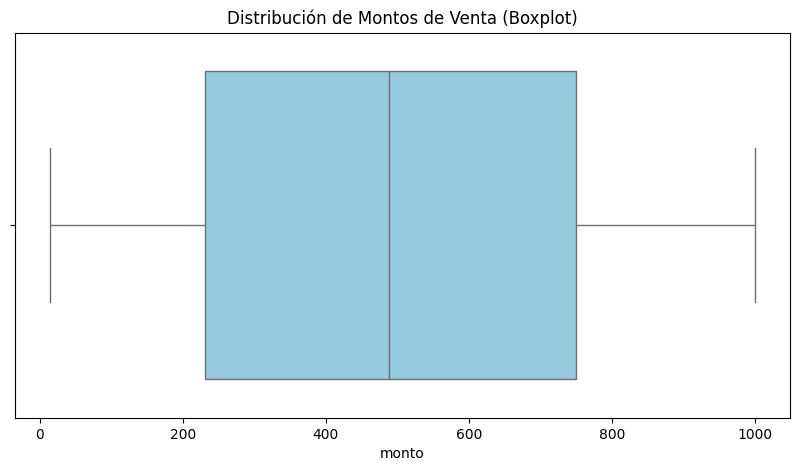

In [3]:
## Pregunta 1: ¿Cómo se distribuyen los montos de las ventas? (Identificar outliers)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['monto'], color='skyblue')
plt.title('Distribución de Montos de Venta (Boxplot)')
plt.show()

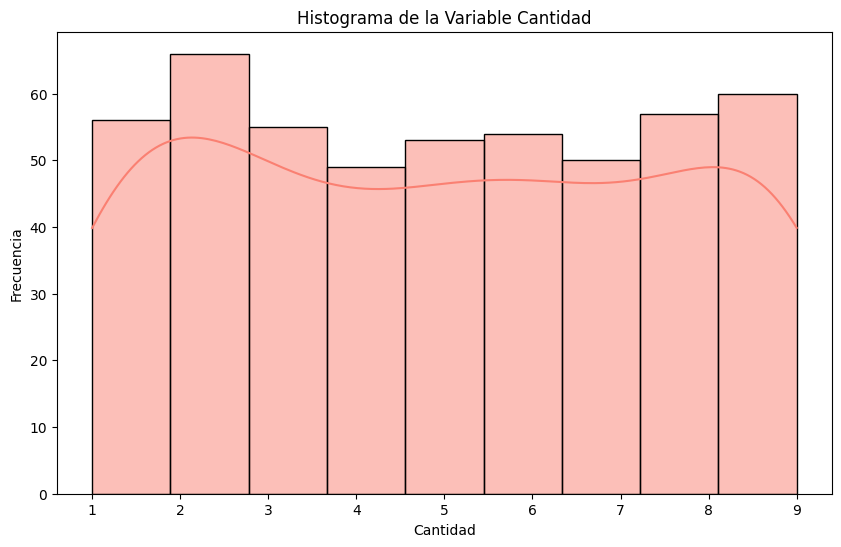

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cantidad'], kde=True, color='salmon', bins=9)
plt.title('Histograma de la Variable Cantidad')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

## Análisis Bivariado

/tmp/ipython-input-769402760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='zona', palette='viridis', order=df['zona'].value_counts().index)


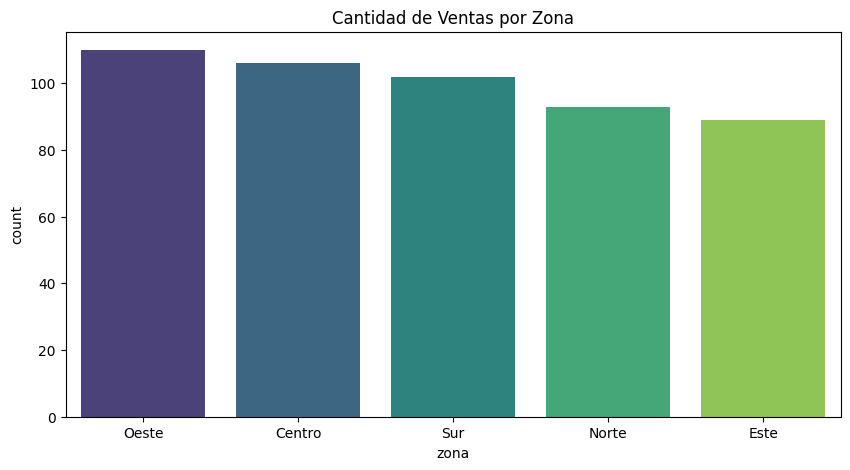

In [4]:
## Pregunta 2: ¿Cuál es el volumen de ventas por zona?
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='zona', palette='viridis', order=df['zona'].value_counts().index)
plt.title('Cantidad de Ventas por Zona')
plt.show()



     zona     monto
0   Oeste  57621.75
1     Sur  49913.69
2    Este  46832.36
3   Norte  46686.02
4  Centro  46189.28


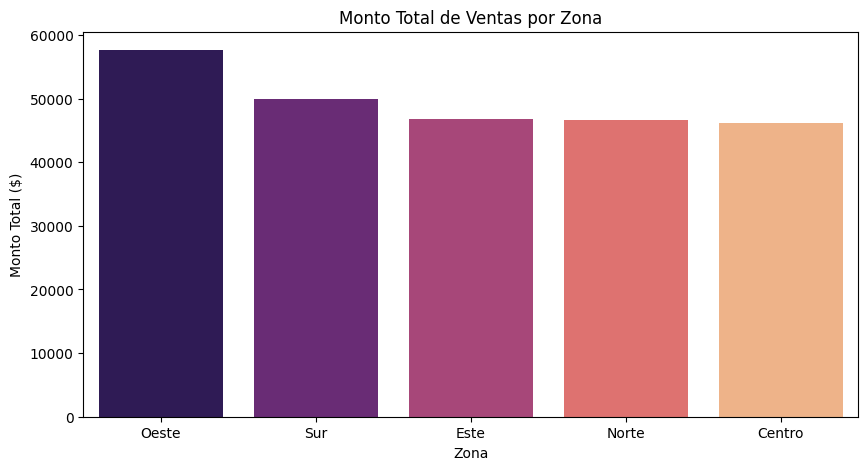

In [16]:
## Cálculo del monto total de ventas por zona
ventas_por_zona = df.groupby('zona')['monto'].sum().sort_values(ascending=False).reset_index()
print(ventas_por_zona)

# Visualización
plt.figure(figsize=(10, 5))
sns.barplot(data=ventas_por_zona, x='zona', y='monto', hue='zona', palette='magma', legend=False)
plt.title('Monto Total de Ventas por Zona')
plt.ylabel('Monto Total ($)')
plt.xlabel('Zona')
plt.show()

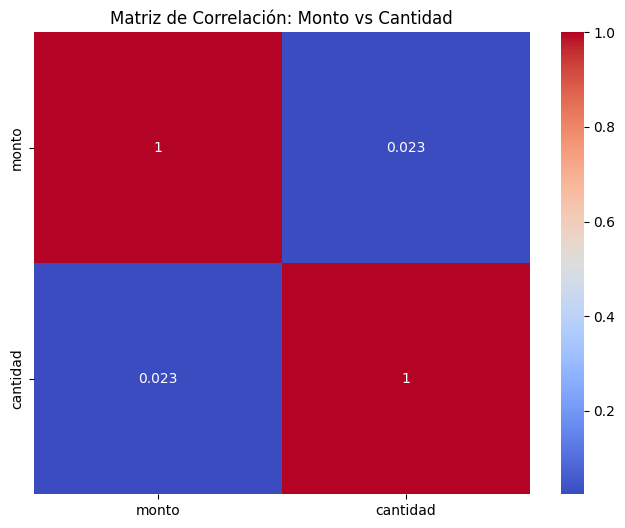

In [6]:
## Pregunta 3: ¿Existe alguna correlación entre la cantidad de productos comprados y el monto?
plt.figure(figsize=(8, 6))
correlation_matrix = df[['monto', 'cantidad']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación: Monto vs Cantidad')
plt.show()


In [17]:
# Calcular la cantidad total vendida por zona y producto
ventas_por_producto_zona = df.groupby(['zona', 'producto'])['cantidad'].sum().reset_index()

# Encontrar el producto con el m&aacute;ximo de cantidad para cada zona
idx = ventas_por_producto_zona.groupby(['zona'])['cantidad'].idxmax()
productos_mas_vendidos_por_zona = ventas_por_producto_zona.loc[idx].sort_values(by='cantidad', ascending=False)

productos_mas_vendidos_por_zona

,zona,producto,cantidad
15,Oeste,Cables,138
21,Sur,Laptop,132
1,Centro,Laptop,127
9,Este,Teclado,121
13,Norte,Mouse,113


In [18]:
# 1. Crear la columna de trimestre
df['trimestre'] = df['fecha'].dt.to_period('Q')

# 2. Agrupar la cantidad total por producto y trimestre
ventas_trimestrales = df.groupby(['trimestre', 'producto'])['cantidad'].sum().reset_index()

# 3. Pivotar para mostrarlo en formato de tabla clara
tabla_resumen = ventas_trimestrales.pivot(index='producto', columns='trimestre', values='cantidad')
tabla_resumen

trimestre,2025Q1,2025Q2,2025Q3,2025Q4
producto,,,,
Cables,93,146,84,144
Laptop,140,154,95,181
Monitor,111,143,88,100
Mouse,110,121,87,137
Teclado,113,150,139,148


In [19]:
# 1. Generar la columna de meses
df['mes'] = df['fecha'].dt.month

# 2. Agrupar la cantidad total de cada producto por trimestre en una tabla
# Usamos pivot_table para una visualizaci&oacute;n clara
tabla_trimestral = df.pivot_table(
    index='producto',
    columns='trimestre',
    values='cantidad',
    aggfunc='sum'
)

tabla_trimestral

trimestre,2025Q1,2025Q2,2025Q3,2025Q4
producto,,,,
Cables,93,146,84,144
Laptop,140,154,95,181
Monitor,111,143,88,100
Mouse,110,121,87,137
Teclado,113,150,139,148


In [20]:
# Agrupar la cantidad total de cada producto por mes en una tabla
tabla_mensual = df.pivot_table(
    index='producto',
    columns='mes',
    values='cantidad',
    aggfunc='sum',
    fill_value=0
)

display(tabla_mensual)

mes,1,2,3,4,5,6,7,8,9,10,11,12
producto,,,,,,,,,,,,
Cables,51,18,24,50,46,50,28,39,17,48,56,40
Laptop,34,41,65,41,52,61,18,51,26,66,63,52
Monitor,39,25,47,51,44,48,13,28,47,43,32,25
Mouse,46,30,34,24,66,31,16,47,24,92,18,27
Teclado,32,36,45,43,56,51,30,50,59,55,38,55


### Análisis Multivariado


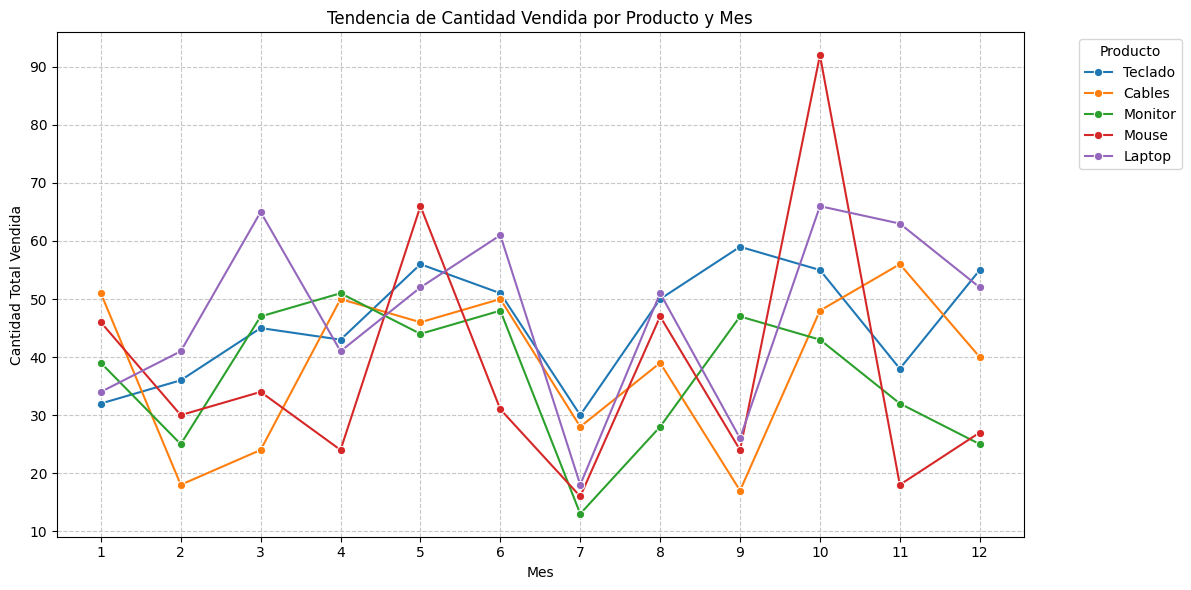

In [21]:
## Visualización de tendencias por producto y mes
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='mes', y='cantidad', hue='producto', estimator='sum', marker='o', errorbar=None)
plt.title('Tendencia de Cantidad Vendida por Producto y Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad Total Vendida')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
!pip install ydata-profiling


In [23]:
from ydata_profiling import ProfileReport
# Generate the profile report
profile = ProfileReport(df, title="My Dataset Profiling Report", explorative=True)
profile


# To save the report as a file:
profile.to_file("output_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 122.12it/s]
/usr/local/lib/python3.12/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 9 7 8 6 5 7 3 7 3 6 0 0 0 6 9 8 0 2 6 1 8 0 9 0 8 9 0 9 9 2 0 6 1 3 6 9
 3 9 0 1 4 6 7 4 8 8 8 0 5 2 7 1 2 7 9 9 9 7 3 8 7 4 0 9 1 8 3 2 4 5 4 9 2
 0 9 4 5 2 7 9 3 8 0 8 8 0 2 0 5 7 0 9 4 4 5 0 8 4 6 6 7 8 3 6 9 8 5 0 6 5
 4 8 9 3 3 8 9 9 6 0 9 3 7 4 9 9 0 1 4 8 5 9 2 6 2 3 0 3 8 6 1 9 9 8 8 0 3
 8 3 0 8 1 9 1 6 5 1 1 4 4 1 4 7 1 7 1 4 9 2 2 3 2 0 1 8 9 9 9 3 9 9 1 6 3
 1 1 5 3 9 2 9 6 8 2 7 9 2 9 7 0 1 8 9 8 2 6 4 4 0 3 8 8 8 6 7 0 9 9 8 9 0
 2 9 8 2 3 8 8 5 0 7 9 8 3 8 8 9 0 0 4 6 4 8 3 3 2 4 3 0 1 3 1 9 9 7 9 2 1
 0 4 1 9 6 8 0 1 7 9 4 4 9 0 3 2 8 6 6 0 0 7 0 3 3 4 1 4 5 0 4 9 8 1 0 4 0
 2 1 4 5 9 3 4 6 1 4 0 2 6 4 2 3 3 8 3 4 0 3 1 1 7 7 9 8 7 1 3 9 0 3 4 6 8
 5 8 0 1 6 2 0 8 4 2 0 6 6 9 4 1 3 9 1 5 7 0 9 3 0 0 4 3 7 6 5 0 

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 75.5 MB/s eta 0:00:00


In [26]:
import numpy as np
import sweetviz as sv

# Parche de compatibilidad para NumPy 2.0+
if not hasattr(np, 'VisibleDeprecationWarning'):
    np.VisibleDeprecationWarning = UserWarning

my_report = sv.analyze(df)

# Generate and save the report as an HTML file
my_report.show_html('SWEETVIZ_REPORT.html')

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [27]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 52.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.1/155.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.6/694.6 kB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of nltk to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of nltk to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of nbconver

KeyboardInterrupt: 

In [ ]:
from dataprep.eda import create_report
create_report(df).show_browser()

In [ ]:
!pip install autoviz